In [2]:
import pandas as pd
import numpy as np

# Load the dataset
file_path = '/content/p1_movie_metadata.csv'
movie_data = pd.read_csv(file_path)

# Displaying basic information about the dataset to understand structure and identify columns with missing data
print("Initial Dataset Information:")
print(movie_data.info())


Initial Dataset Information:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5043 entries, 0 to 5042
Data columns (total 28 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   color                      5024 non-null   object 
 1   director_name              4939 non-null   object 
 2   num_critic_for_reviews     4993 non-null   float64
 3   duration                   5028 non-null   float64
 4   director_facebook_likes    4939 non-null   float64
 5   actor_3_facebook_likes     5020 non-null   float64
 6   actor_2_name               5030 non-null   object 
 7   actor_1_facebook_likes     5036 non-null   float64
 8   gross                      4159 non-null   float64
 9   genres                     5043 non-null   object 
 10  actor_1_name               5036 non-null   object 
 11  movie_title                5043 non-null   object 
 12  num_voted_users            5043 non-null   int64  
 13  cast_total_facebook

In [3]:
# Calculating the number of missing values in each column to prioritize data cleaning efforts
missing_values = movie_data.isnull().sum()
print("\nMissing values in each column:\n", missing_values)



Missing values in each column:
 color                         19
director_name                104
num_critic_for_reviews        50
duration                      15
director_facebook_likes      104
actor_3_facebook_likes        23
actor_2_name                  13
actor_1_facebook_likes         7
gross                        884
genres                         0
actor_1_name                   7
movie_title                    0
num_voted_users                0
cast_total_facebook_likes      0
actor_3_name                  23
facenumber_in_poster          13
plot_keywords                153
movie_imdb_link                0
num_user_for_reviews          21
language                      14
country                        5
content_rating               303
budget                       492
title_year                   108
actor_2_facebook_likes        13
imdb_score                     0
aspect_ratio                 329
movie_facebook_likes           0
dtype: int64


In [4]:

# Handling missing values for numerical columns
numerical_columns = ['num_critic_for_reviews', 'duration', 'gross', 'budget',
                     'title_year', 'actor_1_facebook_likes', 'actor_2_facebook_likes',
                     'actor_3_facebook_likes']
for column in numerical_columns:
    if movie_data[column].isnull().any():
        median = movie_data[column].median()
        movie_data[column].fillna(median, inplace=True)
        print(f"Filled missing values in {column} with median value {median}.")

# Checking if any numerical columns still contain missing values
print("\nMissing values after imputation in numerical columns:\n", movie_data[numerical_columns].isnull().sum())


Filled missing values in num_critic_for_reviews with median value 110.0.
Filled missing values in duration with median value 103.0.
Filled missing values in gross with median value 25517500.0.
Filled missing values in budget with median value 20000000.0.
Filled missing values in title_year with median value 2005.0.
Filled missing values in actor_1_facebook_likes with median value 988.0.
Filled missing values in actor_2_facebook_likes with median value 595.0.
Filled missing values in actor_3_facebook_likes with median value 371.5.

Missing values after imputation in numerical columns:
 num_critic_for_reviews    0
duration                  0
gross                     0
budget                    0
title_year                0
actor_1_facebook_likes    0
actor_2_facebook_likes    0
actor_3_facebook_likes    0
dtype: int64


In [5]:
# Handling missing values for categorical data
categorical_columns = ['director_name', 'content_rating', 'plot_keywords',
                       'actor_3_name', 'actor_2_name', 'actor_1_name',
                       'language', 'country']
for column in categorical_columns:
    if movie_data[column].isnull().any():
        mode = movie_data[column].mode().iloc[0]
        movie_data[column].fillna(mode, inplace=True)
        print(f"Filled missing values in {column} with mode value {mode}.")

# Handle missing 'color' with a placeholder and handle missing 'director_facebook_likes' with 0
movie_data['color'].fillna('Unknown', inplace=True)
movie_data['director_facebook_likes'].fillna(0, inplace=True)

# Dropping rows where 'director_name' is missing
initial_count = len(movie_data)
movie_data.dropna(subset=['director_name'], inplace=True)
final_count = len(movie_data)
print(f"Dropped {initial_count - final_count} rows due to missing 'director_name'.")

# Displaying the head of the dataset to confirm the changes
print("\nPreview of dataset after handling missing values:")
print(movie_data.head())


Filled missing values in director_name with mode value Steven Spielberg.
Filled missing values in content_rating with mode value R.
Filled missing values in plot_keywords with mode value based on novel.
Filled missing values in actor_3_name with mode value Ben Mendelsohn.
Filled missing values in actor_2_name with mode value Morgan Freeman.
Filled missing values in actor_1_name with mode value Robert De Niro.
Filled missing values in language with mode value English.
Filled missing values in country with mode value USA.
Dropped 0 rows due to missing 'director_name'.

Preview of dataset after handling missing values:
     color      director_name  num_critic_for_reviews  duration  \
0    Color      James Cameron                   723.0     178.0   
1    Color     Gore Verbinski                   302.0     169.0   
2    Color         Sam Mendes                   602.0     148.0   
3    Color  Christopher Nolan                   813.0     164.0   
4  Unknown        Doug Walker            

In [6]:
# Feature Engineering

# Extract unique genres
all_genres = set()
for genres in movie_data['genres']:
    all_genres.update(genres.split('|'))
all_genres = list(all_genres)

# Generate binary features for each genre
for genre in all_genres:
    movie_data[f'genre_{genre}'] = movie_data['genres'].apply(lambda x: 1 if genre in x.split('|') else 0)

# Compute average release interval for each director
movie_data['previous_movie_year'] = movie_data.groupby('director_name')['title_year'].shift(1)
movie_data['release_interval'] = movie_data['title_year'] - movie_data['previous_movie_year']
movie_data['average_release_interval'] = movie_data.groupby('director_name')['release_interval'].transform('mean').fillna(0)

# Compute average gross earnings for each director
movie_data['average_gross'] = movie_data.groupby('director_name')['gross'].transform('mean').fillna(0)

# Save the enhanced dataset to a new CSV file
enhanced_file_path = '/content/p1_movie_metadata_enhanced.csv'
movie_data.to_csv(enhanced_file_path, index=False)
print(f"Enhanced data saved as {enhanced_file_path}.")

Enhanced data saved as /content/p1_movie_metadata_enhanced.csv.



Descriptive Statistics for Numerical Columns:
        num_critic_for_reviews     duration  director_facebook_likes  \
count             5043.000000  5043.000000              5043.000000   
mean               139.894904   107.188578               672.351576   
std                121.034214    25.160972              2785.871819   
min                  1.000000     7.000000                 0.000000   
25%                 50.000000    93.000000                 6.000000   
50%                110.000000   103.000000                45.000000   
75%                194.000000   118.000000               189.000000   
max                813.000000   511.000000             23000.000000   

       actor_3_facebook_likes  actor_1_facebook_likes         gross  \
count             5043.000000             5043.000000  5.043000e+03   
mean               643.762344             6552.312711  4.444529e+07   
std               1661.341930            15011.762327  6.277281e+07   
min                  0.00000

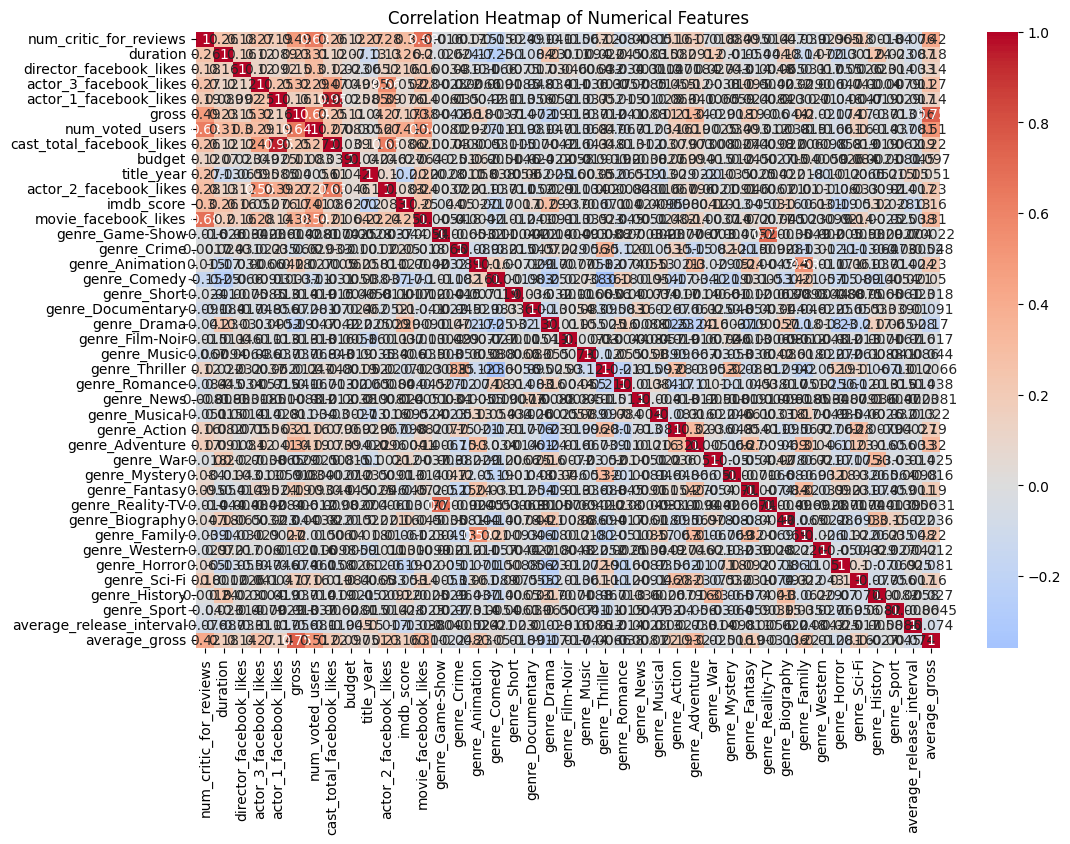

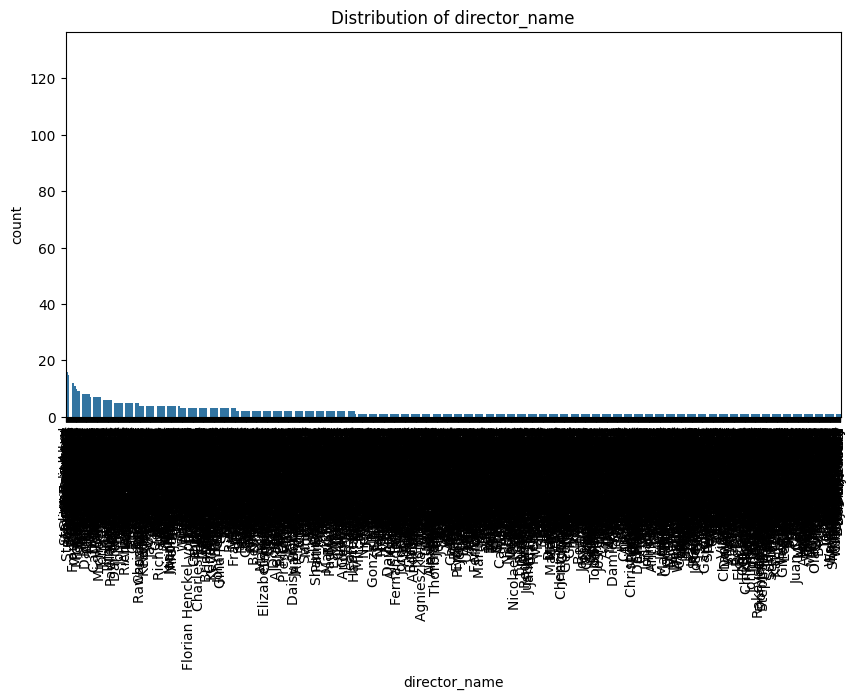

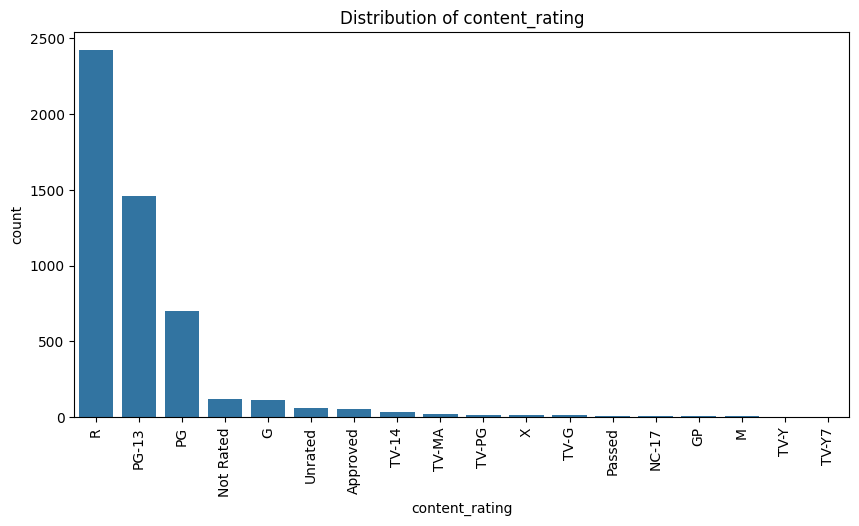

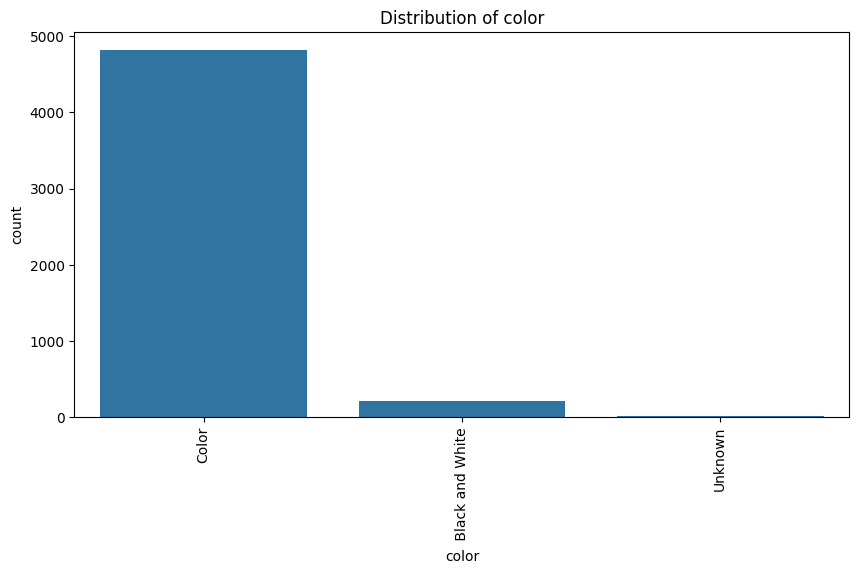

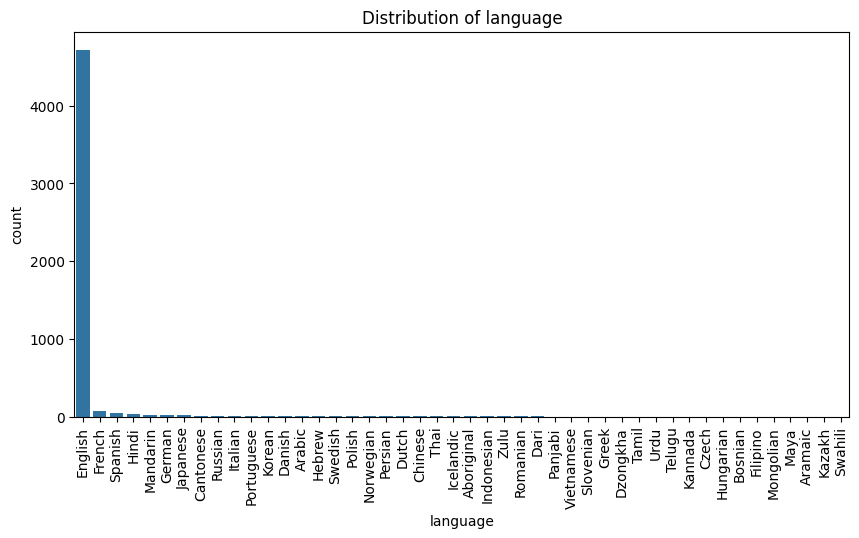

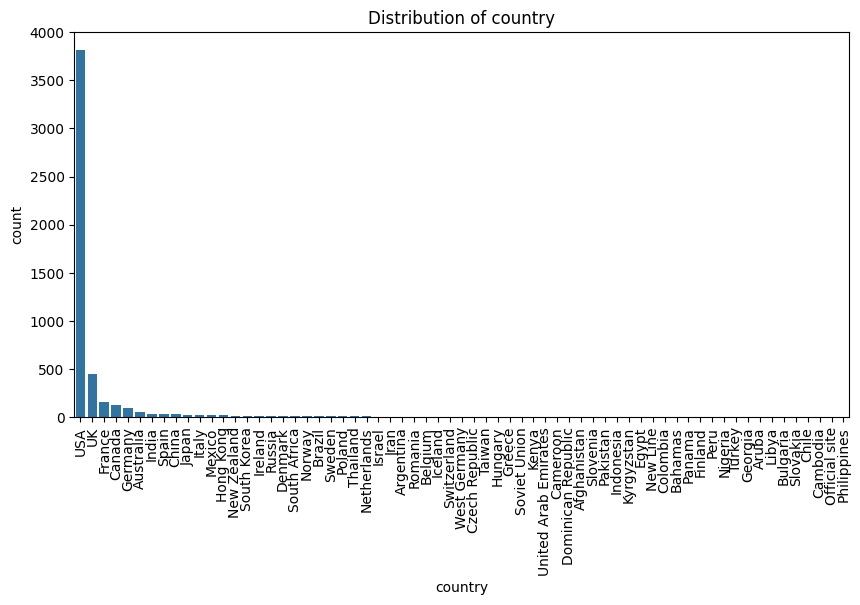

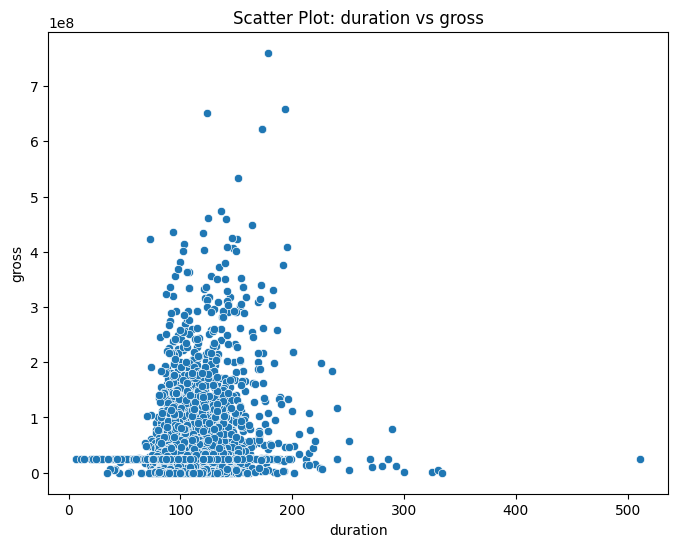

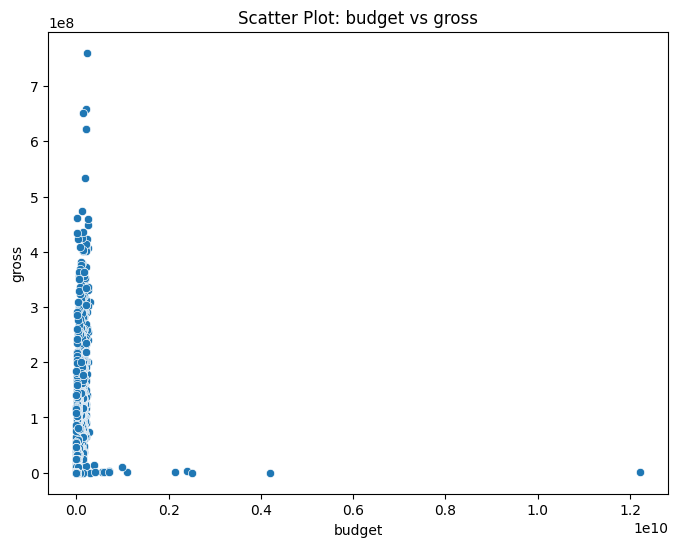

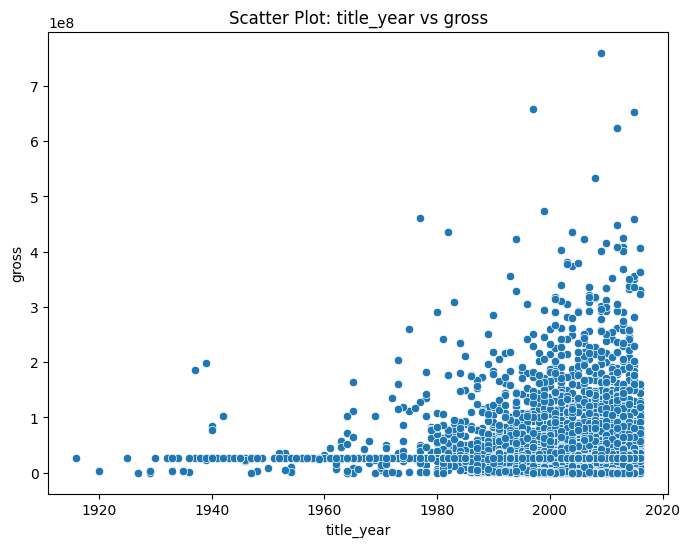

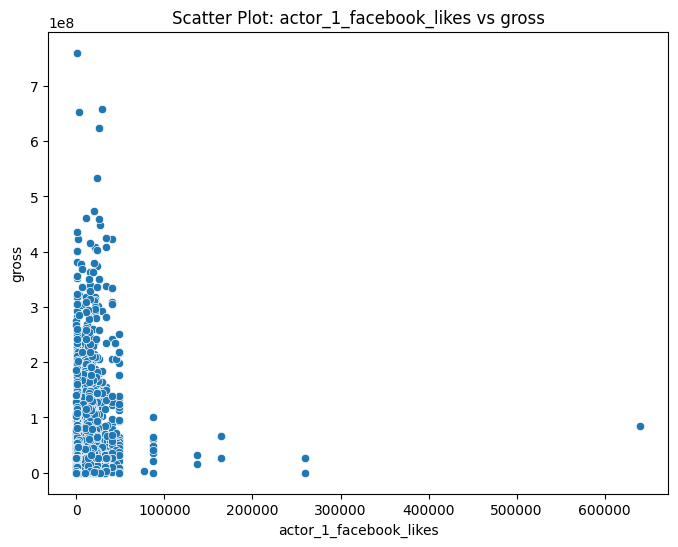

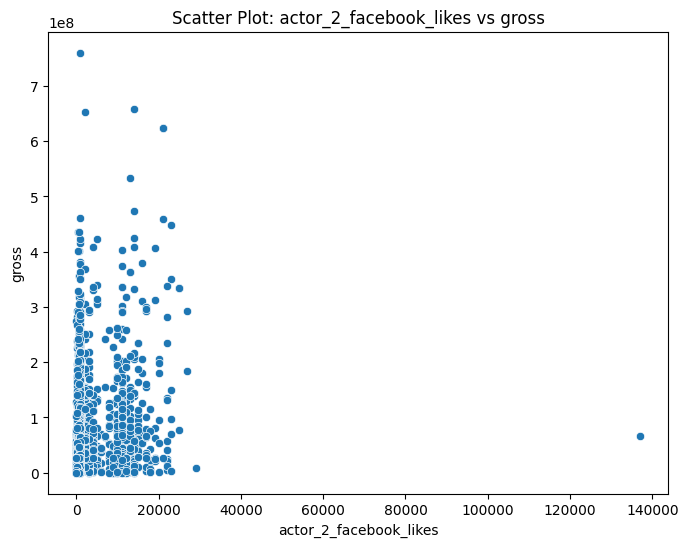

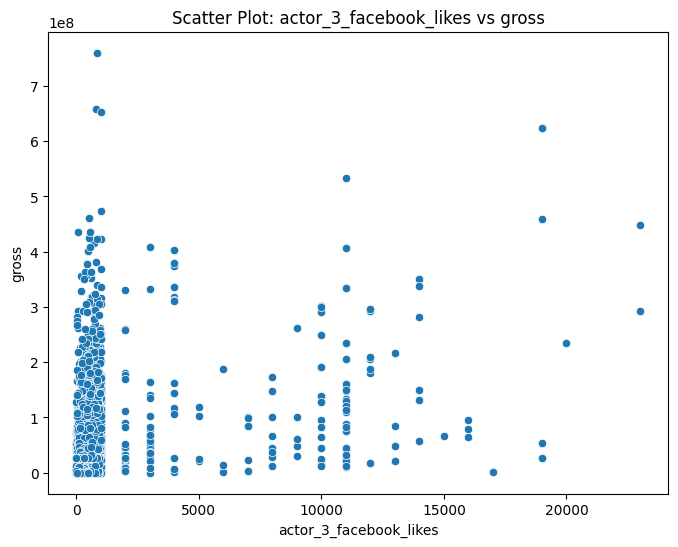

In [8]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Statistical Analysis
# Generate descriptive statistics summary for numerical columns
numerical_summary = movie_data.describe()
print("\nDescriptive Statistics for Numerical Columns:\n", numerical_summary)

# Generate descriptive statistics summary for categorical columns
categorical_summary = movie_data.describe(include=[object])
print("\nDescriptive Statistics for Categorical Columns:\n", categorical_summary)

# Visualization
# Convert non-numeric columns to NaN
numeric_movie_data = movie_data.apply(pd.to_numeric, errors='coerce')

# Drop columns with NaN values, which indicate non-numeric entries
numeric_movie_data = numeric_movie_data.dropna(axis=1, how='any')

# Create a heatmap for the correlation between numerical features
plt.figure(figsize=(12, 8))
sns.heatmap(numeric_movie_data.corr(), annot=True, cmap="coolwarm", center=0)
plt.title("Correlation Heatmap of Numerical Features")
plt.show()

# Create bar plots for categorical data distributions
categorical_columns = ['director_name', 'content_rating', 'color', 'language', 'country']
for column in categorical_columns:
    plt.figure(figsize=(10, 5))
    sns.countplot(data=movie_data, x=column, order=movie_data[column].value_counts().index)
    plt.xticks(rotation=90)
    plt.title(f"Distribution of {column}")
    plt.show()

# Create scatter plots to identify potential relationships
scatter_columns = [
    ('duration', 'gross'),
    ('budget', 'gross'),
    ('title_year', 'gross'),
    ('actor_1_facebook_likes', 'gross'),
    ('actor_2_facebook_likes', 'gross'),
    ('actor_3_facebook_likes', 'gross'),
]

for x, y in scatter_columns:
    plt.figure(figsize=(8, 6))
    sns.scatterplot(data=movie_data, x=x, y=y)
    plt.title(f"Scatter Plot: {x} vs {y}")
    plt.show()


Gradient Boosting Regressor Cross-Validation Scores: [0.4161521  0.39150919 0.46901381 0.33920605 0.40975095]
Gradient Boosting Regressor Mean CV Score: 0.40512641961070217


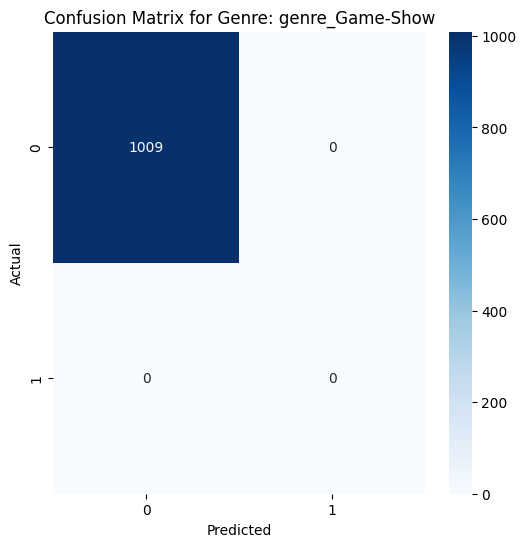

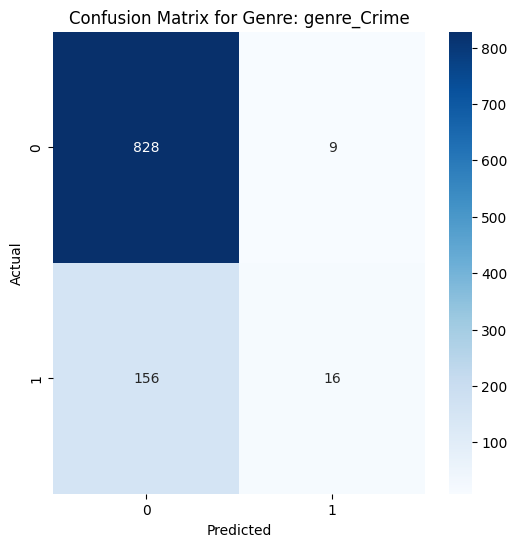

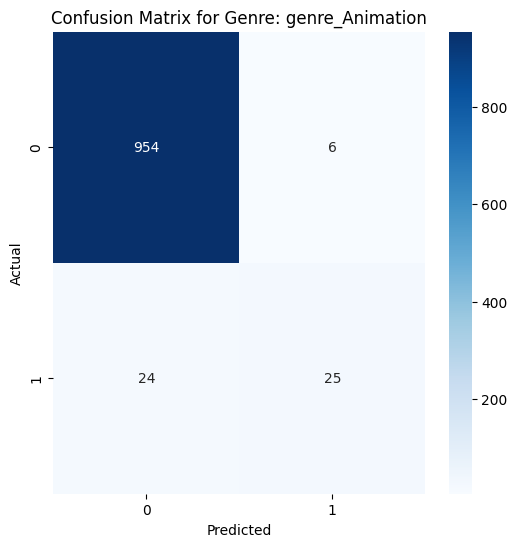

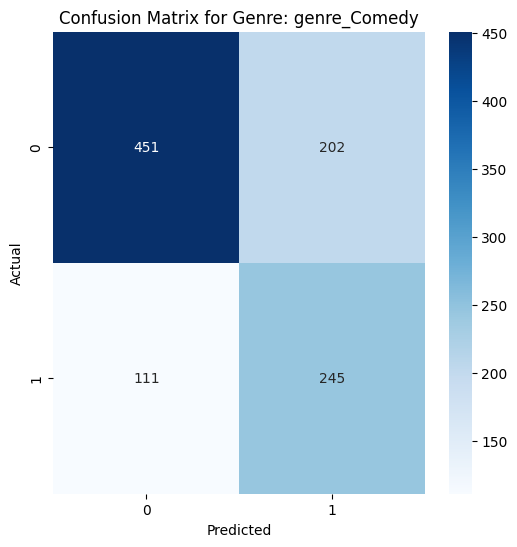

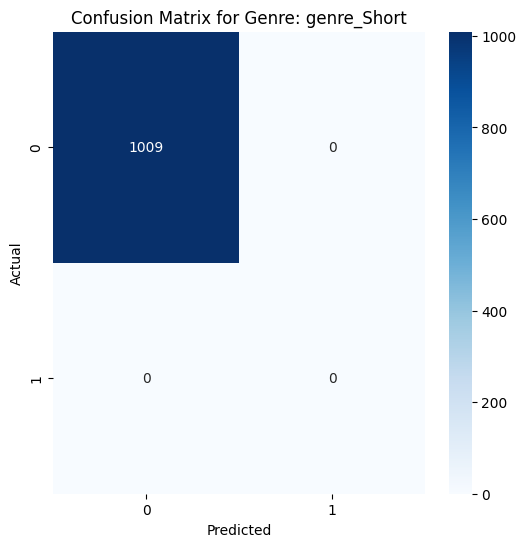

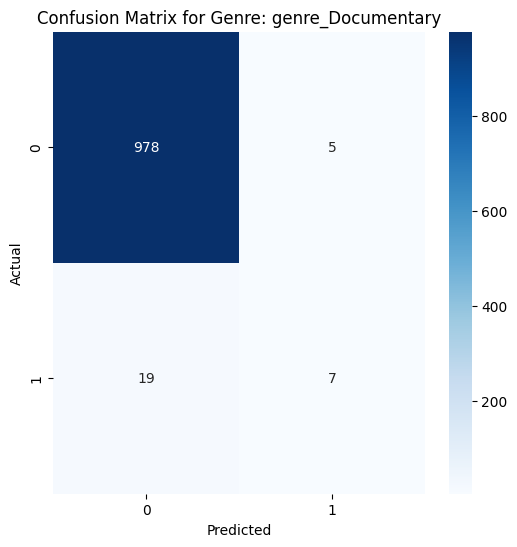

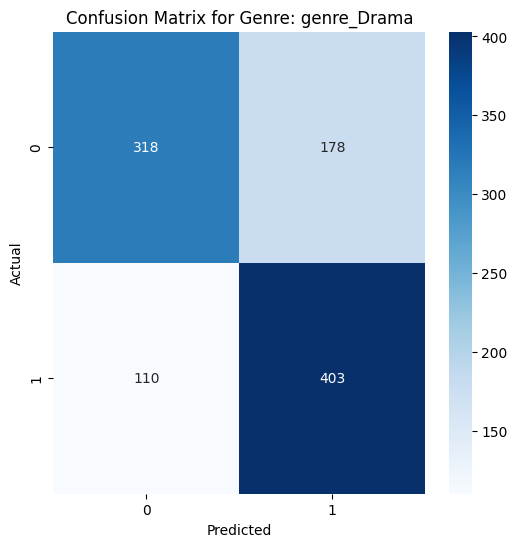

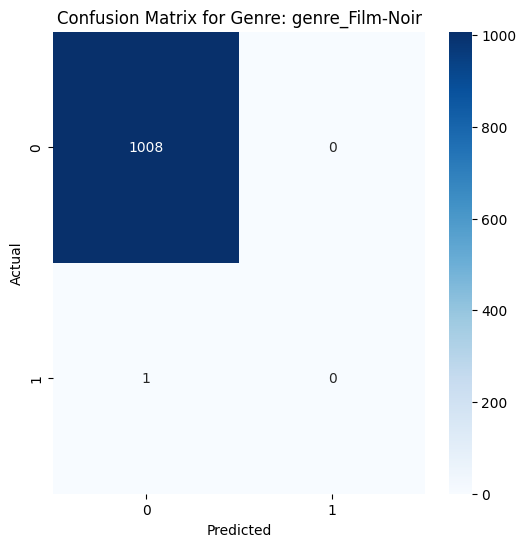

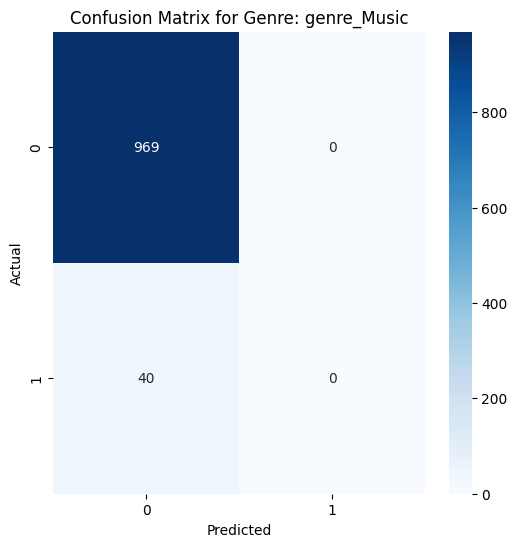

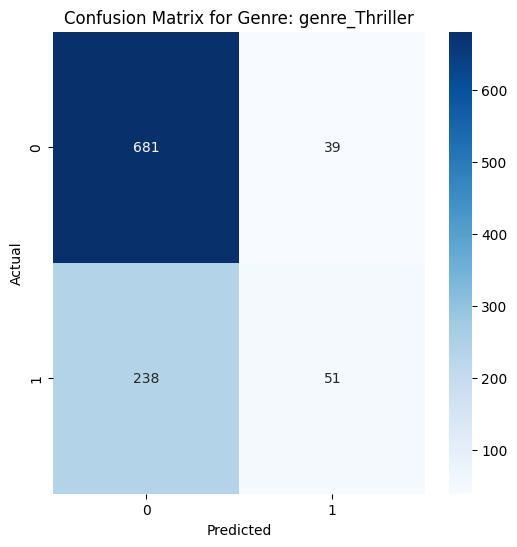

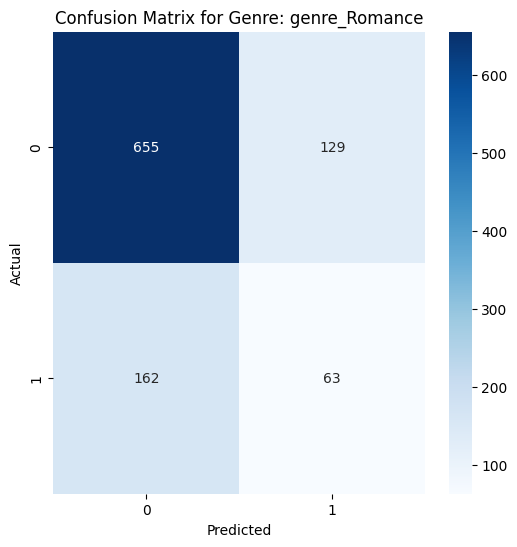

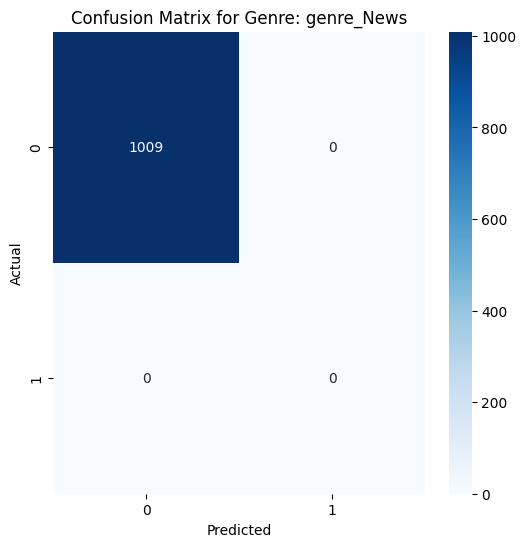

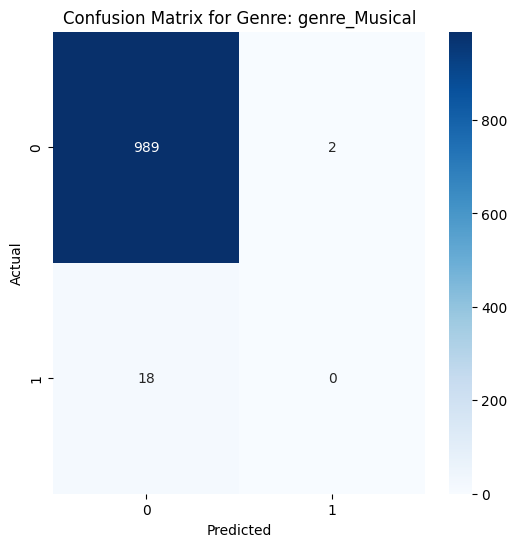

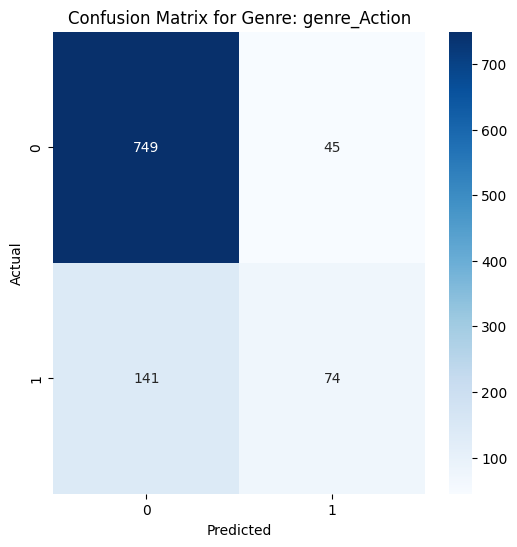

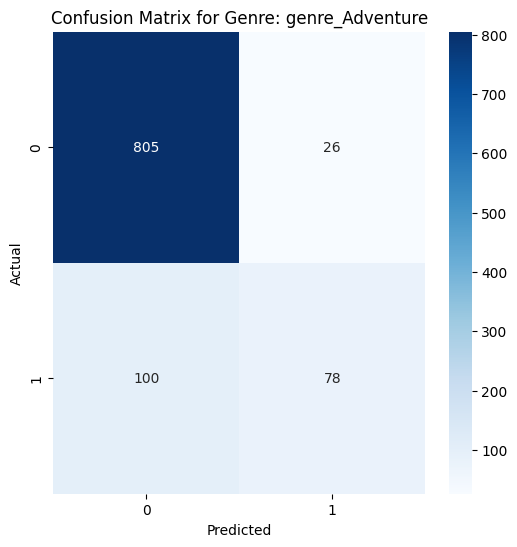

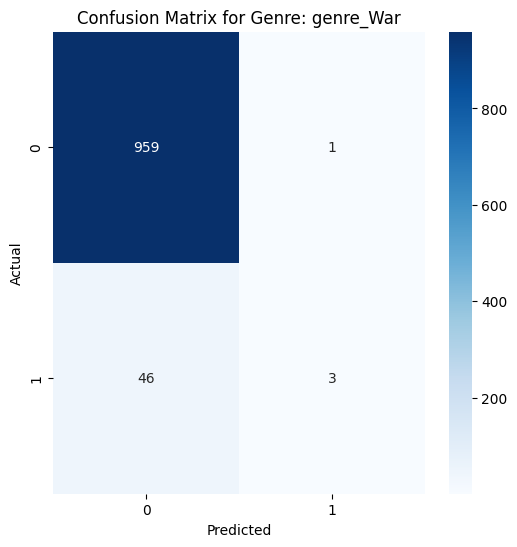

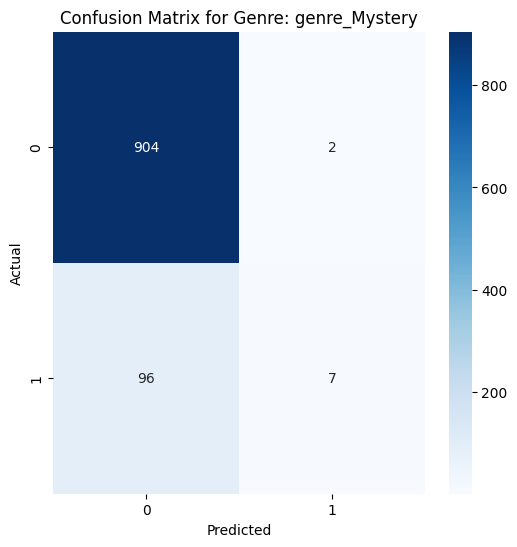

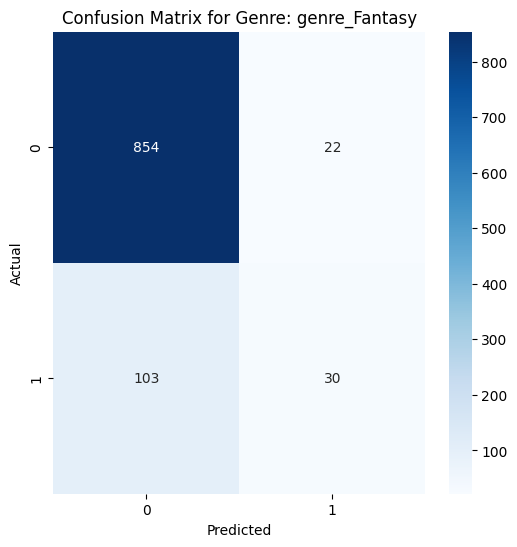

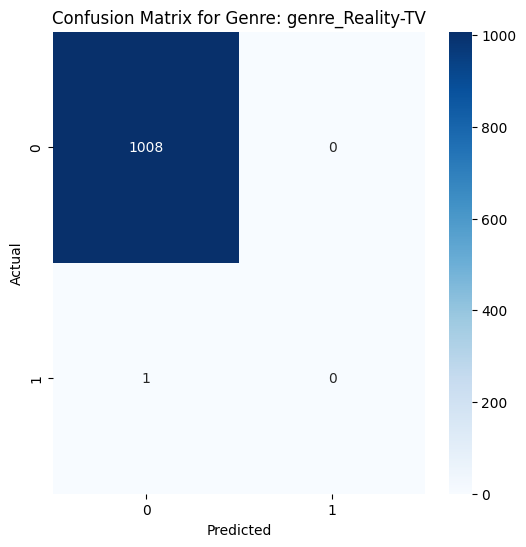

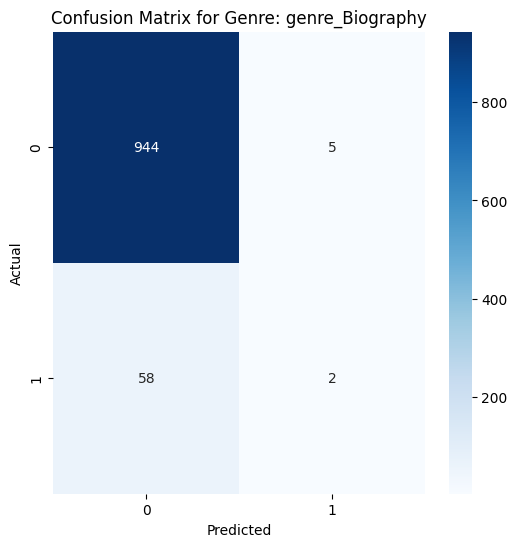

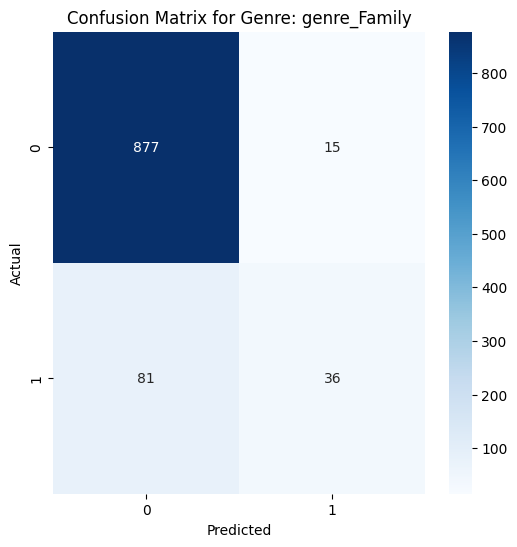

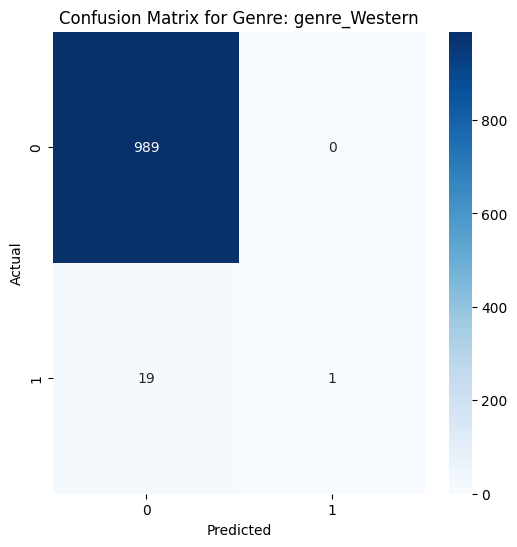

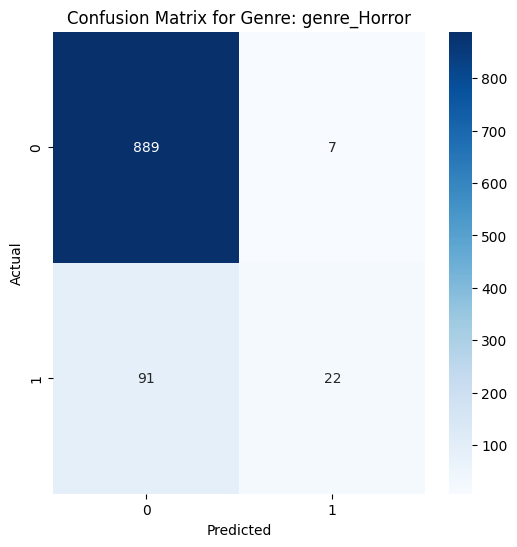

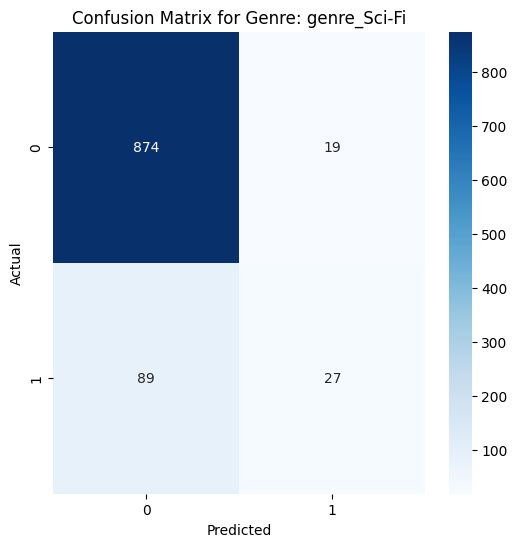

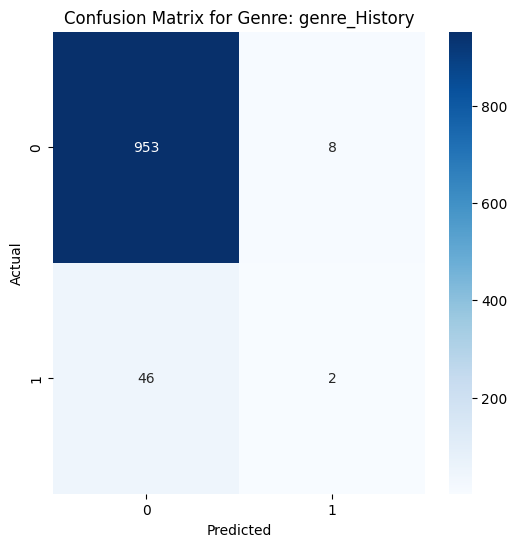

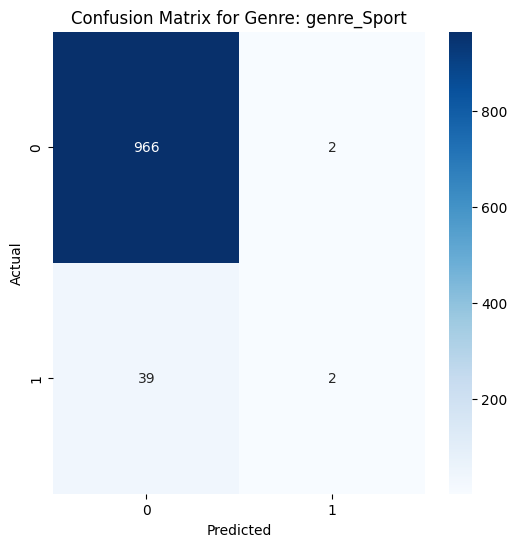

Model Evaluation Metrics:
+--------------------------------------+---------------------------+------------+
| Model                                | Metric                    |      Score |
+======================================+===========================+============+
| Gradient Boosting Regressor          | Mean Absolute Error (MAE) |  5.94465   |
+--------------------------------------+---------------------------+------------+
| Gradient Boosting Regressor          | Mean Squared Error (MSE)  | 86.0554    |
+--------------------------------------+---------------------------+------------+
| Gradient Boosting Regressor          | R-Squared (R²)            |  0.469028  |
+--------------------------------------+---------------------------+------------+
| Classifier Chain (Voting Classifier) | F1 Score                  |  0.465631  |
+--------------------------------------+---------------------------+------------+
| Classifier Chain (Voting Classifier) | Accuracy                  |  0.

In [50]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
from sklearn.ensemble import GradientBoostingRegressor, RandomForestClassifier, VotingClassifier
from sklearn.multioutput import ClassifierChain
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score, f1_score, accuracy_score, hamming_loss, precision_score, recall_score, multilabel_confusion_matrix
from sklearn.feature_selection import SelectKBest, f_classif
from tabulate import tabulate
import seaborn as sns
import matplotlib.pyplot as plt
import xgboost as xgb
from xgboost import XGBClassifier

# Load the enhanced dataset
file_path = 'p1_movie_metadata_enhanced.csv'
data = pd.read_csv(file_path)

# Feature Engineering: Using SelectKBest for feature selection
regression_features = ['num_critic_for_reviews', 'duration', 'director_facebook_likes',
                       'actor_1_facebook_likes', 'actor_2_facebook_likes', 'actor_3_facebook_likes',
                       'gross', 'budget', 'average_release_interval', 'average_gross']

X = data[regression_features]
y_regression = data['title_year']

# Feature selection for classification
genre_columns = [col for col in data.columns if col.startswith('genre_')]
y_classification = data[genre_columns]

# Split the data into training and testing sets
X_train, X_test, y_train_regression, y_test_regression = train_test_split(
    X, y_regression, test_size=0.2, random_state=42)
X_train_multi, X_test_multi, y_train_classification, y_test_classification = train_test_split(
    X, y_classification, test_size=0.2, random_state=42)

# Gradient Boosting Regressor with Grid Search and Cross-Validation
gbr = GradientBoostingRegressor(random_state=42)
gbr_params = {
    'n_estimators': [100, 200, 300],
    'max_depth': [3, 5, 7],
    'learning_rate': [0.01, 0.1, 0.2]
}
gbr_grid = GridSearchCV(gbr, gbr_params, scoring='r2', cv=5)
gbr_grid.fit(X_train, y_train_regression)
best_gbr = gbr_grid.best_estimator_

# Cross-validation for Gradient Boosting Regressor
cv_scores = cross_val_score(best_gbr, X_train, y_train_regression, cv=5)
print(f"Gradient Boosting Regressor Cross-Validation Scores: {cv_scores}")
print(f"Gradient Boosting Regressor Mean CV Score: {cv_scores.mean()}")

y_pred_gbr = best_gbr.predict(X_test)

# Evaluate Gradient Boosting Regressor
mae_gbr = mean_absolute_error(y_test_regression, y_pred_gbr)
mse_gbr = mean_squared_error(y_test_regression, y_pred_gbr)
r2_gbr = r2_score(y_test_regression, y_pred_gbr)

# Classifier Chain with Random Forest and XGBoost as an ensemble
rf = RandomForestClassifier(random_state=42)
xgb = XGBClassifier(random_state=42)
vc = VotingClassifier(estimators=[('rf', rf), ('xgb', xgb)], voting='soft')
chain = ClassifierChain(vc, order='random', random_state=42)
chain.fit(X_train_multi, y_train_classification)
y_pred_chain = chain.predict(X_test_multi)

# Evaluate Classifier Chain
f1_chain = f1_score(y_test_classification, y_pred_chain, average='micro')
accuracy_chain = accuracy_score(y_test_classification, y_pred_chain)
hamming_loss_chain = hamming_loss(y_test_classification, y_pred_chain)
precision_chain = precision_score(y_test_classification, y_pred_chain, average='micro')
recall_chain = recall_score(y_test_classification, y_pred_chain, average='micro')

# Confusion Matrices for Classifier Chain
conf_matrices = multilabel_confusion_matrix(y_test_classification, y_pred_chain)
for i, genre in enumerate(genre_columns):
    plt.figure(figsize=(6, 6))
    sns.heatmap(conf_matrices[i], annot=True, fmt='d', cmap='Blues')
    plt.title(f'Confusion Matrix for Genre: {genre}')
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    plt.show()

# Tabulate the results
results = [
    ["Gradient Boosting Regressor", "Mean Absolute Error (MAE)", mae_gbr],
    ["Gradient Boosting Regressor", "Mean Squared Error (MSE)", mse_gbr],
    ["Gradient Boosting Regressor", "R-Squared (R²)", r2_gbr],
    ["Classifier Chain (Voting Classifier)", "F1 Score", f1_chain],
    ["Classifier Chain (Voting Classifier)", "Accuracy", accuracy_chain],
    ["Classifier Chain (Voting Classifier)", "Hamming Loss", hamming_loss_chain],
    ["Classifier Chain (Voting Classifier)", "Precision", precision_chain],
    ["Classifier Chain (Voting Classifier)", "Recall", recall_chain]
]

table = tabulate(results, headers=["Model", "Metric", "Score"], tablefmt="grid")
print("Model Evaluation Metrics:")
print(table)
